In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba

In [3]:
data_df = pd.read_excel('./A-Web raw data 2015 Apr - 2018 Aug.xlsx')

In [4]:
data_df.head()

,CreatedDate,RequestID,CaseNumber,EngineerEmail,EngineerName,DealerName,Telephone,Language,OpCo,ProductCategory,...,RequestRoutedDate,ResponseTimeMinute,Product,ProductType,ResolutionSummary,CaseClosed,ClosedDate,RequestHandlingTimeMinute,RequestRoutedBy,OnSiteRequest
0,30/05/2018 8:29:13 PM,ASP29438,NaN,tsanhuang.tsai@twn.fujixerox.com,蔡燦煌,台灣富士全錄-Hsinchu,03-5999580,zh-TW,FXTW,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NO
1,30/05/2018 7:15:05 PM,ASP29437,NaN,weilung.chen@twn.fujixerox.com,陳緯隆,台灣富士全錄-Taoyuan,32174107,zh-TW,FXTW,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NO
2,30/05/2018 6:26:22 PM,ASP29436,NaN,mingbing.pan@twn.fujixerox.com,潘銘彬,台灣富士全錄-Kaohsiung,955823827,zh-TW,FXTW,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NO
3,30/05/2018 5:33:16 PM,ASP29435,NaN,wenchin.chen@twn.fujixerox.com,陳文欽,台灣富士全錄-Banciao,955816860,zh-TW,FXTW,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NO
4,30/05/2018 5:10:44 PM,ASP29434,NaN,KAI.YANG@twn.fujixerox.com,楊凱翔,台灣富士全錄-Taipei,955897376,zh-TW,FXTW,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NO


In [5]:
data_df['OpCo'].value_counts()

FXTW         10964
FXCL ASP     10323
FXA            786
FXMM           253
FXCA           216
FXCL           181
China           72
FXM             60
FXP             12
FXMSB           11
Australia        7
Malaysia         6
FXPC VIET        3
FXTH             2
FXS              1
Name: OpCo, dtype: int64

In [14]:
china_df = data_df[data_df['OpCo']=='FXCL ASP']
china_df = pd.DataFrame(china_df)
china_df.to_csv('./china_df.csv')

In [15]:
df = pd.read_csv('./china_df.csv')

In [16]:
df.head()

,Unnamed: 0,CreatedDate,RequestID,CaseNumber,EngineerEmail,EngineerName,DealerName,Telephone,Language,OpCo,...,RequestRoutedDate,ResponseTimeMinute,Product,ProductType,ResolutionSummary,CaseClosed,ClosedDate,RequestHandlingTimeMinute,RequestRoutedBy,OnSiteRequest
0,10,30/05/2018 4:13:08 PM,ASP29428,C2394137,1225689178@qq.com,时鹏,乌鲁木齐众意达工贸有限公司-WRO,18097784999,zh-CN,FXCL ASP,...,NaN,16.0,DocuCentre-IV C4470,Hardware,*** PHONE LOG 01-06-2018 15:38 krshenxin Actio...,YES,2018-01-06 16:12:24,2879.0,NaN,YES
1,22,30/05/2018 1:42:16 PM,ASP29417,C2394134,67679260@qq.com,易威,湖南万企达科技发展有限公司-SRO,13874901885,zh-CN,FXCL ASP,...,NaN,10.0,DocuCentre S2011 - for China/K,Hardware,*** PHONE LOG 01-06-2018 15:37 krshenxin Actio...,YES,2018-01-06 16:11:41,3029.0,NaN,YES
2,28,30/05/2018 12:44:54 PM,ASP29411,C2394133,67679260@qq.com,易威,湖南万企达科技发展有限公司-SRO,13874901885,zh-CN,FXCL ASP,...,NaN,19.0,DocuCentre S2011 - for China/K,Hardware,*** PHONE LOG 01-06-2018 15:36 krshenxin Actio...,YES,2018-01-06 16:10:42,3086.0,NaN,YES
3,29,30/05/2018 12:30:23 PM,ASP29410,C2394133,67679260@qq.com,易威,湖南万企达科技发展有限公司-SRO,13874901885,zh-CN,FXCL ASP,...,NaN,13.0,DocuCentre S2011 - for China/K,Hardware,*** PHONE LOG 01-06-2018 15:36 krshenxin Actio...,YES,2018-01-06 16:10:42,3100.0,NaN,YES
4,35,30/05/2018 11:19:16 AM,ASP29404,NaN,857499305@qq.com,梁华贵,桐乡易采办公用品有限公司-ERO,13698469232,zh-CN,FXCL ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES


In [22]:
word_list = []  #分词结果放在word_list列表中
key_list = []   #对word_list列表中的分词结果，进行循环处理，去重后的值作为key
final = ''        #自定义字符串，主要用来做词云
stopwords = ['，','。','、','！','(',')','（','）',',','.','!','施乐','客户',' ','机器','无法','出现','复印件','显示','提示']  # 停止词

for n in range(df.shape[0]):
    seg_list = list(jieba.cut(df['ProblemSummary'].astype('str')[n]))
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
                word_list.append(seg)

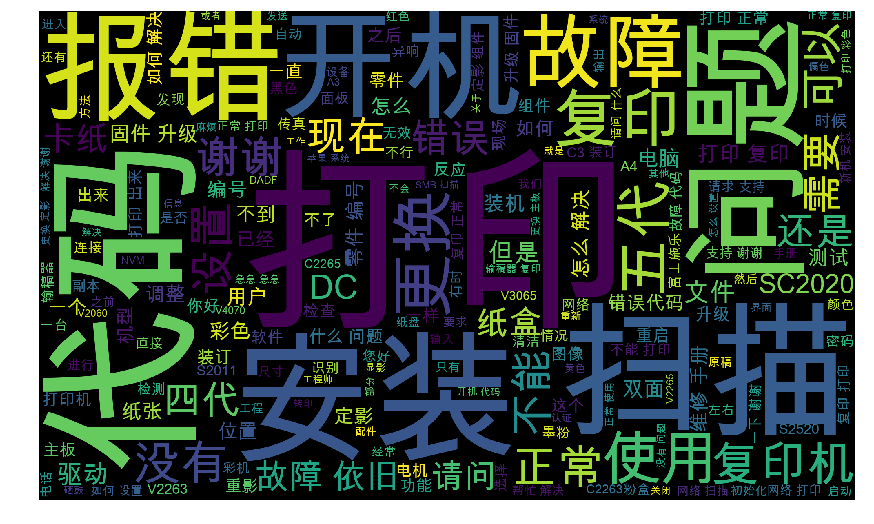

In [23]:
my_wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',width=2000,height=1200).generate(final)
#font_path指定中文编码，否则不能显示中文 
plt.figure(figsize=(16,9))
plt.imshow(my_wordcloud)   #显示词云
plt.axis('off')                      #关掉坐标轴
plt.savefig('./ciyun1.png') #保存生成的词云图
plt.show()

In [27]:
word_list = []  #分词结果放在word_list列表中
key_list = []   #对word_list列表中的分词结果，进行循环处理，去重后的值作为key
final = ''        #自定义字符串，主要用来做词云
stopwords = ['，','。','、','！','(',')','（','）',',','.','!','施乐','客户',' ','机器','无法','出现','复印机','显示','提示',
            '代码','安装','报错','开机','故障','问题','谢谢','现在','使用','没有','可以']  # 停止词

for n in range(df.shape[0]):
    seg_list = list(jieba.cut(df['ProblemSummary'].astype('str')[n]))
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
                word_list.append(seg)

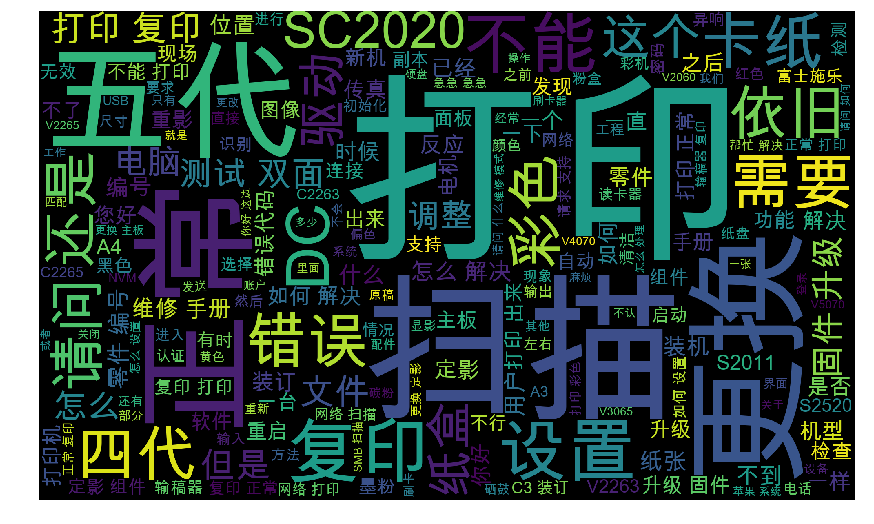

In [28]:
my_wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',width=2000,height=1200).generate(final)
#font_path指定中文编码，否则不能显示中文 
plt.figure(figsize=(16,9))
plt.imshow(my_wordcloud)   #显示词云
plt.axis('off')                      #关掉坐标轴
plt.savefig('./ciyun2.png') #保存生成的词云图
plt.show()

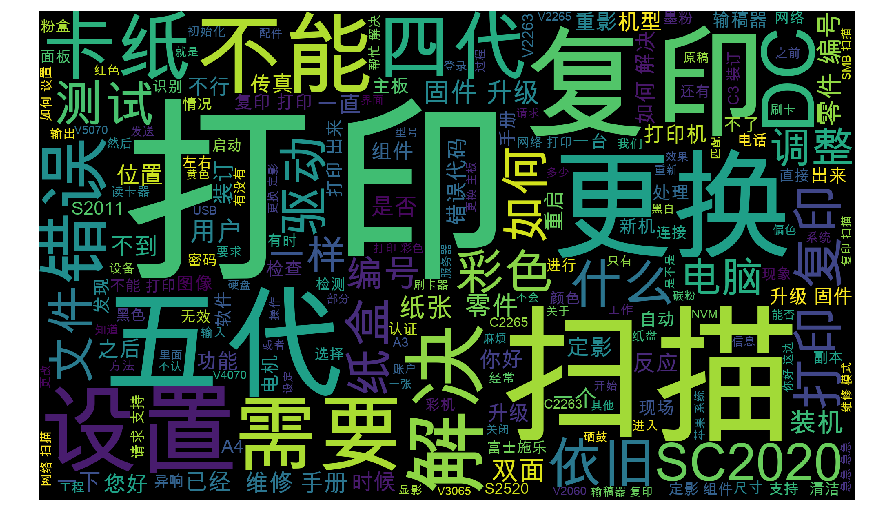

In [29]:
word_list = []  #分词结果放在word_list列表中
key_list = []   #对word_list列表中的分词结果，进行循环处理，去重后的值作为key
final = ''        #自定义字符串，主要用来做词云
stopwords = ['，','。','、','！','(',')','（','）',',','.','!','施乐','客户',' ','机器','无法','出现','复印机','显示','提示',
            '代码','安装','报错','开机','故障','问题','谢谢','现在','使用','没有','可以','请问','怎么','还是','正常','这个','但是']  # 停止词

for n in range(df.shape[0]):
    seg_list = list(jieba.cut(df['ProblemSummary'].astype('str')[n]))
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
                word_list.append(seg)
                
my_wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',width=2000,height=1200).generate(final)
#font_path指定中文编码，否则不能显示中文 
plt.figure(figsize=(16,9))
plt.imshow(my_wordcloud)   #显示词云
plt.axis('off')                      #关掉坐标轴
plt.savefig('./ciyun3.png') #保存生成的词云图
plt.show()

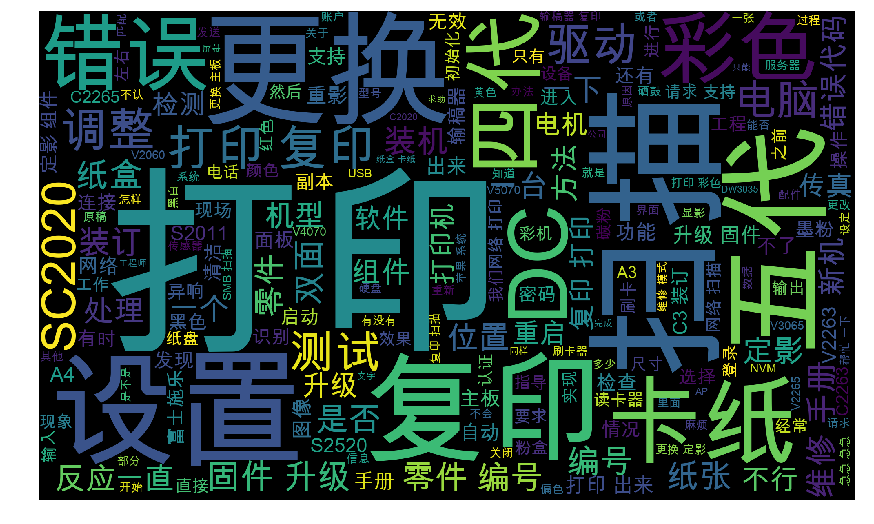

In [32]:
word_list = []  
key_list = []   
final = ''        
stopwords = ['，','。','、','！','(',')','（','）',',','.','!','施乐','客户',' ','机器','无法','出现','复印机','显示','提示',
            '代码','安装','报错','开机','故障','问题','谢谢','现在','使用','没有','可以','请问','怎么','还是','正常','这个','但是',
            '需要','解决','您好','已经','不能','文件','依旧','不到','用户','时候','之后','你好','什么','一样','如何']  # 停止词

for n in range(df.shape[0]):
    seg_list = list(jieba.cut(df['ProblemSummary'].astype('str')[n]))
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
                word_list.append(seg)
                
my_wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',width=2000,height=1200).generate(final)
#font_path指定中文编码，否则不能显示中文 
plt.figure(figsize=(16,9))
plt.imshow(my_wordcloud)   #显示词云
plt.axis('off')                      #关掉坐标轴
plt.savefig('./ciyun4.png') #保存生成的词云图
plt.show()